In [1]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
#La descripción de las variables puede ser encontrada en:
#https://docs.google.com/spreadsheets/d/1seSDd6qGugEBULL_60W4h2Aicj8C3oyKDKbVfUPh2Sc/edit#gid=0

In [3]:
#leer la base de datos
df = pd.read_stata('../SABE.dta')

In [4]:
df['recall'].unique()

array([3., 6., 5., 4., 0., 2., 1.], dtype=float32)

(array([  313.,   227.,     0.,   422.,     0.,  2783.,  2195.,     0.,
         6129., 11625.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

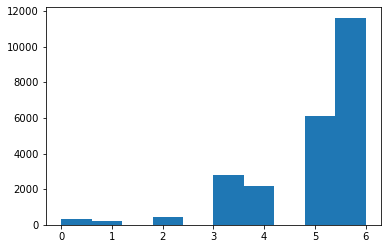

In [5]:
plt.hist(df['recall'])

In [6]:
df['edadcategogrip']

0        60-64
1        65-69
2        74-79
3        70-74
4        65-69
         ...  
23689    70-74
23690    70-74
23691    70-74
23692    70-74
23693    70-74
Name: edadcategogrip, Length: 23694, dtype: category
Categories (7, object): ['60-64' < '65-69' < '70-74' < '74-79' < '80-84' < '85+' < 108]

In [7]:
for col in df.columns:
    print(f'{col}')

id
p104
p112
p113_1
p113_2
p114_1
p114_2
estrato_2
p117
regionut
pam
p121
p122edad
p122mes
p122anio
p124
p125
p126ar
p126mesa
p126per
p126rep
p126
p127r9
p127r7
p127r5
p127r3
p127r1
p127
p128tpd
p128dm
p128ps
p128
p129ar
p129mesa
p129per
p129
p130
minmenpam
p131
p132
p132a
edadproxi
generoproxi
p133_p133t2_1
p133_p133t2_2
p133_p133t2_3
p133_p133t2_4
p133
p134ar
p134mesa
p134per
p134rep
p134
p135r9
p135r7
p135r5
p135r3
p135r1
p135
p136tpd
p136dm
p136ps
p136
p137ar
p137mesa
p137per
p137
p138
minmenpro
p139_1
p139_2
p139_3
p139_4
p139_5
p139_6
p139_7
p139cual
p139a
p140
p141
p141a_1
p141a_2
p141a_3
p141a_4
p141a_5
p141a_8
p141a_9
p141b_1
p141b_2
p141b_3
p141b_4
p141b_5
p141b_6
p141b_8
p141b_9
p142
p142a
p142b
p142bcual
p201
p202
p203
p204
p205
p205si
p205cual
p206
p207
p208
p209
p226
p227
p228
p229
p229cual
p230
p230a
p231
p232
p233
p234
p235
p235cual
p236
p237_1
p237_2
p237_3
p237_4
p237_5
p237_6
p237_7
p237_8
p238
p239_1
p239_2
p239_3
p239_4
p239_5
p239_6
p239_7
p240
p241
p242_1
p242_2


In [8]:
df['p510a'].value_counts()

0      23390
1        100
2         55
3         38
4         25
5         22
999       14
10        13
6         10
8          8
888        5
20         5
7          3
30         2
40         1
15         1
9          1
28         1
Name: p510a, dtype: int64

In [9]:
#Columna de rendimiento cognitivo
df['cogcat_folstein'].value_counts()

Normal        17678
Impaired       4717
Borderline     1299
Name: cogcat_folstein, dtype: int64

In [10]:
# cambiar entradas 77 por 7 - trabajo de profesional independiente
df['p229'].replace(77, 7, inplace =True)

In [11]:
#Cambiar valores categoricos de minimental por numéricos
df['cogcat_folstein'].replace({'Normal':1, 'Impaired':2,'Borderline':3}, inplace=True)


In [12]:
df['cogcat_folstein'].value_counts()

1    17678
2     4717
3     1299
Name: cogcat_folstein, dtype: int64

In [13]:
col_to_del = ['diabetes','cancer','copd','osteoporosis','peso']
#eliminar columnas para que no hayan duplicados
for col in col_to_del:
    df.drop([col], axis=1, inplace= True)

In [14]:
#Crear columna test depresion basado en respuestas de columnas previas
cols =['p614','p615','p616','p617','p618','p619','p620','p621','p622','p623','p624','p625']
df['test_depresion'] = df[cols].sum(axis=1) 

In [15]:
def depresion(valor):
        if valor>=19: 
            return 3 #Depresion
        elif 10 < valor and  valor < 19:
            return 2 #Depresion leve
        elif valor<=10:
            return 1 #Sin depresion
    
    

In [16]:
df['tiene_depresion'] = df['test_depresion'].map(depresion)

In [17]:
df['tiene_depresion'].value_counts()

2    15973
1     4705
3     3016
Name: tiene_depresion, dtype: int64

In [18]:
#Creación de columna Barthel basado en respuestas a preguntas anteriores
cols = ['p701','p702','p703','p704','p705','p706','p707','p708','p709','p710']
df['barthel'] =  df[cols].sum(axis=1)  

In [19]:
def nivel_dependencia(valor):
    if valor <= 35: 
        return 4 #Dependencia grave
    elif 60 > valor > 35:
        return 3 #Dependencia moderada
    elif 100 > valor >= 60:
        return 2 #Dependencia leve
    elif valor == 100:
       return 1 #Independiente
    

In [20]:
df['nivel_dependencia']= df['barthel'].map(nivel_dependencia)

In [21]:
df['nivel_dependencia'].value_counts()

1    18465
2     4794
4      227
3      208
Name: nivel_dependencia, dtype: int64

In [22]:
#creación columna ayuda: recibe ayuda del estado
ayuda = df.loc[(df['p412_1'] == 1) | (df['p412_2'] == 1)| (df['p412_3'] == 1) | (df['p412_4'] == 1) | (df['p412_5'] == 1) | (df['p412_6'] == 1)].index
ayuda_no_sabe = df.loc[df['p412_8']==1].index
ayuda_no_responde = df.loc[df['p412_9']==1].index
df['ayuda'] = np.zeros(23694, dtype=int)

for i in ayuda_no_sabe:
    df.at[i,'ayuda'] = 9
    
for i in ayuda_no_responde:
    df.at[i,'ayuda'] = 8
    
for i in ayuda:
    df.at[i,'ayuda'] = 1
    

In [23]:
df['ayuda'].value_counts()

0    19429
1     4047
9      155
8       63
Name: ayuda, dtype: int64

In [24]:
#Reemplazar 7 por 9- no sabe o no responde en columnas relacionadas con habitos
cols = ['p407a_1' ,'p407a_2', 'p407a_3', 'p407a_4', 'p407a_5', 'p407a_6', 'p407a_7', 'p407a_8', 'p407a_9', 'p407b_1', 'p407b_2', 'p407b_3', 'p407b_4', 'p407b_5', 'p407b_6', 'p407b_7', 'p407b_8', 'p407b_9']
for col in cols:
    df[col].replace(to_replace = 7, value = 9, inplace= True)

In [25]:
#Creación de columnas voluntario 
voluntario_no = df.loc[df['p413_7']==1].index
voluntario_no_sabe = df.loc[df['p413_9']==1].index
voluntario_no_resp = df.loc[df['p413_8']==1].index
df['voluntario'] = np.ones(23694, dtype=int)



for i in voluntario_no_sabe:
    df.at[i,'voluntario'] = 9
    
for i in voluntario_no_resp:
    df.at[i,'voluntario'] = 8
    
for i in voluntario_no:
    df.at[i,'voluntario'] = 0


In [26]:
df['voluntario'].value_counts()

0    20153
1     3387
8      121
9       33
Name: voluntario, dtype: int64

In [27]:
df['skintone'].unique()

['medio', 'claro', 'oscuro']
Categories (3, object): ['claro' < 'medio' < 'oscuro']

In [28]:
#assert(False)

In [29]:
df.rename(columns={'velmarch':'velocidad_marcha','orienttot':'orientacion','language':'lenguaje','counting':'conteo','p510a':'cons_vino','p510b':'cons_cerveza','p510c':'cons_licor','p104':'area_vivienda','estrato_2':'estrato','p121':'sexo','p122edad':'edad', 'p124':'estado_civil','p139a':'num_personas_hogar','p140':'afiliacion_pension','skintone':'color_piel', 'p301':'tipo_vivienda','p141':'afiliacion_salud','p142a':'grupo_etnico','p142b':'raza','p201':'sabe_leer','p202':'sabe_escribir','p203':'a_educacion','p204':'nivel_educativo','p226':'ha_trabajado','p228':'edad_primer_trabajo','p229':'tipo_de_trabajo','p240':'ingresos','p243':'suficiencia_recursos','p244':'satisfaccion_ingresos','p309':'habitacion_unica','p317':'utiliza_computador','p318':'utiliza_internet','p327':'fuente_de_agua','p302':'posesion_vivienda','p332':'medio_transporte','p401':'religion','p404':'sentirse_viejo','p407a_1':'lee_libros','p407a_2':'escribe','p407a_3':'resuelve_matematica','p407a_4':'pasatiempos','p407a_5':'escuchar_radio','p407a_6':'ver_television','p407a_7':'juegos_de_mesa','p407a_8':'manualidades','p407a_9':'hablar_con_familiares','p407b_1':'visitar_familiares','p407b_2':'actividad_fisica','p407b_3':'navegar_internet','p407b_4':'asistir_cursos','p407b_5':'hobbies','p407b_6':'compras','p407b_7':'bibliotecas_museos','p407b_8':'eventos_cult_dep','p407b_9':'viajar','p411_1':'beneficiario_alimentacion','p411_2':'beneficiario_col_mayor','p419':'desplazado', 'p501': 'alimentacion','p502':'comidas_al_dia','p503':'lacteos','p504':'granos','p505':'carne','p506':'frutas_verduras','p509':'consumo_alcohol','p511':'consumo_cigarrillo','p516':'sexualidad','p611':'mem_subjetiva','p612':'problemas_memoria','p613':'comparacion_memoria','p719':'ejercicio','p720':'caminar','p801':'economia_familiar','p802':'salud_adolescencia','p805':'hambre_adolescencia','p806':'violencia_adolescencia','p807':'percepcion_salud','p810':'hipertension','p812':'diabetes','p814':'cancer','p816':'asma','p818':'enfermedad_cardiaca','p821':'derrame_cerebral','p824':'artrosis','p827':'osteoporosis','p828':'enfermedad_mental','p845':'vision','p853':'problemas_auditivos','p881a':'rechazo_infancia','p883_3':'abuso_gritos','p883_4':'abuso_maltrato_fisico','p883_5':'abuso_agresion','p883_7':'abandono','p883_11':'abuso_economico','p903':'salud_30_dias','p919':'hospitalizacion','1001':'amputacion','p1005peso':'peso','p1006talla':'talla','p1007cintura':'circunferencia_cintura','p242_1':'dependencia_economica','p231':'trabajo_actual', 'p409_12':'participa_grupos','cogtotal':'minimental'},inplace=True)

In [30]:
#Eliminar columnas irrelevantes para el estudio
cols = ['velocidad_marcha','orientacion','lenguaje','conteo','cons_vino','cons_cerveza','cons_licor','nivel_dependencia','trabajo_actual','navegar_internet','voluntario','area_vivienda','tipo_vivienda','utiliza_computador','medio_transporte','utiliza_internet','estrato','posesion_vivienda','sexo','edad','estado_civil','num_personas_hogar','afiliacion_pension','color_piel', 'afiliacion_salud','orientacion','grupo_etnico','raza','sabe_leer','sabe_escribir','a_educacion','nivel_educativo','ha_trabajado','edad_primer_trabajo','tipo_de_trabajo','ingresos','suficiencia_recursos','satisfaccion_ingresos','habitacion_unica','fuente_de_agua','religion','sentirse_viejo','lee_libros','escribe','resuelve_matematica','pasatiempos','escuchar_radio','ver_television','juegos_de_mesa','manualidades','hablar_con_familiares','visitar_familiares','actividad_fisica','asistir_cursos','hobbies','compras','bibliotecas_museos','eventos_cult_dep','viajar','beneficiario_alimentacion','beneficiario_col_mayor','desplazado', 'alimentacion','comidas_al_dia','lacteos','granos','carne','frutas_verduras','consumo_alcohol','consumo_cigarrillo','sexualidad','mem_subjetiva','problemas_memoria','comparacion_memoria','tiene_depresion','ejercicio','caminar','economia_familiar','salud_adolescencia','hambre_adolescencia','violencia_adolescencia','percepcion_salud','hipertension','diabetes','test_depresion','ayuda','barthel','cancer','asma','enfermedad_cardiaca','derrame_cerebral','artrosis','osteoporosis','enfermedad_mental','vision','problemas_auditivos','rechazo_infancia','abuso_gritos','abuso_maltrato_fisico','abuso_agresion','abandono','abuso_economico','salud_30_dias','hospitalizacion','amputacion','peso','talla','circunferencia_cintura','dependencia_economica', 'participa_grupos','cogcat_folstein','IMC','minimental']
for col in df.columns:
    if col not in cols:
       df.drop(col, axis=1, inplace=True)

In [31]:
len(df.columns)

111

In [32]:
#verificar columnas con valores nulos
df.isna().sum()

area_vivienda        0
estrato              0
sexo                 0
edad                 0
estado_civil         0
                    ..
tiene_depresion      0
barthel              0
nivel_dependencia    0
ayuda                0
voluntario           0
Length: 111, dtype: int64

In [33]:
#Eliminar filas con valores nulos
df = df.dropna(axis=0)

In [34]:
#Borrar no sabe no responde de cols: 'cons_vino','cons_cerveza','cons_licor'
cols = ['cons_vino','cons_cerveza','cons_licor']
for col in cols:
    index = df[df[col].isin([888,999])].index
    print(index)
    df.drop(index=index, axis=0, inplace=True)



Int64Index([7805, 9294, 9352, 11250, 12195, 13755, 14243], dtype='int64')
Int64Index([2277, 19673, 20315, 21791], dtype='int64')
Int64Index([1188, 2727, 6504, 6970, 7369, 10024, 12036, 13245, 17473, 18426,
            21296],
           dtype='int64')


In [35]:
df['cons_cerveza'].value_counts()

0     13228
2       122
1        96
10       93
3        92
5        80
4        60
6        58
15       34
8        27
7        23
30       23
12       20
20       16
25        5
40        4
14        2
9         2
24        2
35        1
42        1
Name: cons_cerveza, dtype: int64

In [36]:
#Verificar columnas con valores 9/99 u 8/98 que corresponden con no sabe o no responde
ns_nresponde = []
ns_nr_98_99= []


for col in df.columns:
    if 9 and 8 in df[col].values:
        ns_nresponde.append(col)
    if 98 and 99 in df[col].values:
        ns_nr_98_99.append(col)

In [37]:
#Crear diccionario con valores que representan respuestas nulas (No sabe no responde)
dic_columnas = {}
for col in ns_nresponde:
    dic_columnas[col] = [9,8]
for col in ns_nr_98_99:
    dic_columnas[col] = [98,99]

In [38]:
cols_cero = ['grupo_etnico', 'raza', 'posesion_vivienda', 'tipo_de_trabajo', 'ingresos', 'suficiencia_recursos', 'satisfaccion_ingresos','fuente_de_agua','alimentacion', 'comidas_al_dia', 'lacteos', 'granos', 'carne', 'frutas_verduras', 'mem_subjetiva', 'problemas_memoria', 'comparacion_memoria', 'economia_familiar','salud_adolescencia','hambre_adolescencia', 'violencia_adolescencia', 'percepcion_salud', 'vision', 'rechazo_infancia', 'abuso_gritos', 'abuso_maltrato_fisico', 'abuso_agresion', 'abandono', 'abuso_economico', 'artrosis','salud_30_dias','tipo_vivienda']

In [39]:
for col in cols_cero:
    if col not in dic_columnas:
        dic_columnas[col] = []
    dic_columnas[col].append(0)
        

In [40]:
#Columna vision 7 es valor nulo, se remplaza por 9 para que sea eliminado en el futuro
df['vision'].replace(7,9, inplace=True)

In [41]:
len(df)

13989

In [42]:
df_depresion = df[df['tiene_depresion']==1]

In [43]:
df_depresion

,area_vivienda,estrato,sexo,edad,estado_civil,num_personas_hogar,afiliacion_pension,afiliacion_salud,grupo_etnico,raza,...,conteo,lenguaje,minimental,cogcat_folstein,test_depresion,tiene_depresion,barthel,nivel_dependencia,ayuda,voluntario
20,1,3,2,87,4,3,3,1,0,0,...,1.0,4.0,12.0,2,0,1,100,1,0,0
62,1,2,2,85,5,2,3,2,0,0,...,2.0,3.0,9.0,2,0,1,100,1,0,0
72,1,3,1,94,4,2,3,3,0,0,...,0.0,0.0,0.0,2,0,1,100,1,0,0
82,1,3,2,96,4,4,3,1,0,0,...,2.0,3.0,12.0,2,0,1,85,2,0,0
94,1,1,2,80,4,4,3,1,0,0,...,1.0,4.0,12.0,2,0,1,90,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,1,2,2,79,5,5,3,2,0,0,...,1.0,1.0,8.0,2,0,1,70,2,0,0
23650,1,2,2,86,4,3,3,1,0,0,...,2.0,3.0,9.0,2,0,1,100,1,0,0
23666,1,2,2,82,5,5,3,2,0,0,...,3.0,3.0,10.0,2,0,1,70,2,0,0
23680,1,2,2,84,4,7,3,2,0,0,...,1.0,3.0,7.0,2,0,1,95,2,1,0


In [44]:
#drop columna lee libros porque borra las entradas de personas que saben escribir y leer
df.drop('lee_libros', axis=1, inplace = True)

In [45]:
df['sabe_escribir'].value_counts()

1    10747
2     3226
9       13
8        3
Name: sabe_escribir, dtype: int64

In [46]:
#Se verifican las columnas que más contribuyen a la eliminación de entradas donde tiene_depresion = 1 (Dónde las personas son sanas)
dictionary = {}
indexes = []

for col, value in dic_columnas.items():
    rows = df_depresion[(df_depresion[col].isin(value))].index
    indexes.extend(rows)
    dictionary[col] = len(rows)

to_print = sorted([(key, val) for key, val in dictionary.items()], key=lambda x:x[1], reverse=True)
for i in to_print:
    print(f"{i[0]}:{i[1]}")

suficiencia_recursos:3030
frutas_verduras:3030
economia_familiar:3029
grupo_etnico:3021
raza:3021
satisfaccion_ingresos:3021
alimentacion:3021
comidas_al_dia:3021
lacteos:3021
granos:3021
carne:3021
mem_subjetiva:3021
problemas_memoria:3021
comparacion_memoria:3021
salud_adolescencia:3021
hambre_adolescencia:3021
violencia_adolescencia:3021
percepcion_salud:3021
vision:3021
rechazo_infancia:3021
abuso_gritos:3021
abuso_maltrato_fisico:3021
abuso_agresion:3021
abandono:3021
abuso_economico:3021
navegar_internet:2829
trabajo_actual:2332
salud_30_dias:2009
escribe:1584
resuelve_matematica:1582
pasatiempos:1580
ingresos:770
minimental:722
tipo_de_trabajo:664
posesion_vivienda:473
asistir_cursos:182
circunferencia_cintura:156
num_personas_hogar:126
juegos_de_mesa:76
bibliotecas_museos:73
escuchar_radio:70
edad_primer_trabajo:65
a_educacion:57
ver_television:55
manualidades:54
fuente_de_agua:49
tipo_vivienda:44
hobbies:38
ayuda:35
nivel_educativo:34
voluntario:30
osteoporosis:29
hablar_con_f

In [47]:
dic_columnas

{'num_personas_hogar': [9, 8],
 'afiliacion_pension': [9, 8],
 'afiliacion_salud': [9, 8],
 'grupo_etnico': [9, 8, 0],
 'raza': [9, 8, 0],
 'sabe_leer': [9, 8],
 'sabe_escribir': [9, 8],
 'a_educacion': [98, 99],
 'nivel_educativo': [98, 99],
 'edad_primer_trabajo': [98, 99],
 'tipo_de_trabajo': [98, 99, 0],
 'trabajo_actual': [9, 8],
 'ingresos': [9, 8, 0],
 'suficiencia_recursos': [9, 8, 0],
 'satisfaccion_ingresos': [9, 8, 0],
 'posesion_vivienda': [9, 8, 0],
 'habitacion_unica': [9, 8],
 'utiliza_computador': [9, 8],
 'utiliza_internet': [9, 8],
 'fuente_de_agua': [98, 99, 0],
 'medio_transporte': [98, 99],
 'religion': [9, 8],
 'sentirse_viejo': [9, 8],
 'escribe': [9, 8],
 'resuelve_matematica': [9, 8],
 'pasatiempos': [9, 8],
 'escuchar_radio': [9, 8],
 'ver_television': [9, 8],
 'juegos_de_mesa': [9, 8],
 'manualidades': [9, 8],
 'hablar_con_familiares': [9, 8],
 'visitar_familiares': [9, 8],
 'navegar_internet': [9, 8],
 'asistir_cursos': [9, 8],
 'hobbies': [9, 8],
 'compras'

In [48]:
#Borrar filas con valores no sabe/no responde
indexes = []
to_detele = []
dictionary = {}
threshold = 4040
for col, value in dic_columnas.items():
    rows = df[(df[col].isin(value))].index
    dictionary[col] = len(rows)

for key,value in dictionary.items():
    if value >= threshold:
        print(f'columnas eliminadas por tener más de 5 mil no sabe/no responde {key, value}')
        df.drop(key, inplace= True, axis = 1)

for col, value in dic_columnas.items():
    if col in df.columns:
        rows = df[(df[col].isin(value))].index
        indexes.extend(rows)
        
for i in indexes:
    if i not in to_detele:
        to_detele.append(i)
        
df.drop(to_detele, axis = 0, inplace=True)

print(dictionary)


columnas eliminadas por tener más de 5 mil no sabe/no responde ('trabajo_actual', 11204)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('navegar_internet', 11923)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('salud_30_dias', 9026)
columnas eliminadas por tener más de 5 mil no sabe/no responde ('lenguaje', 8104)
{'num_personas_hogar': 400, 'afiliacion_pension': 68, 'afiliacion_salud': 15, 'grupo_etnico': 3696, 'raza': 3560, 'sabe_leer': 16, 'sabe_escribir': 16, 'a_educacion': 95, 'nivel_educativo': 55, 'edad_primer_trabajo': 117, 'tipo_de_trabajo': 2701, 'trabajo_actual': 11204, 'ingresos': 3168, 'suficiencia_recursos': 3117, 'satisfaccion_ingresos': 3096, 'posesion_vivienda': 1942, 'habitacion_unica': 12, 'utiliza_computador': 84, 'utiliza_internet': 88, 'fuente_de_agua': 191, 'medio_transporte': 19, 'religion': 71, 'sentirse_viejo': 45, 'escribe': 3399, 'resuelve_matematica': 3397, 'pasatiempos': 3397, 'escuchar_radio': 194, 'ver_television': 155, '

In [49]:
df['tiene_depresion'].value_counts()

2    2440
3     495
Name: tiene_depresion, dtype: int64

In [50]:
#Unificar resultados para columnas con opcion si/no
yes_no = []
for col in df.columns:
    if len(df[col].unique()) == 2:
        yes_no.append(col)

In [51]:
yes_no

['area_vivienda',
 'sexo',
 'dependencia_economica',
 'habitacion_unica',
 'utiliza_computador',
 'utiliza_internet',
 'sentirse_viejo',
 'escribe',
 'resuelve_matematica',
 'pasatiempos',
 'escuchar_radio',
 'ver_television',
 'juegos_de_mesa',
 'manualidades',
 'hablar_con_familiares',
 'visitar_familiares',
 'asistir_cursos',
 'hobbies',
 'compras',
 'bibliotecas_museos',
 'eventos_cult_dep',
 'viajar',
 'participa_grupos',
 'beneficiario_alimentacion',
 'beneficiario_col_mayor',
 'desplazado',
 'lacteos',
 'granos',
 'carne',
 'frutas_verduras',
 'ejercicio',
 'caminar',
 'hambre_adolescencia',
 'violencia_adolescencia',
 'problemas_auditivos',
 'abuso_agresion',
 'hipertension',
 'diabetes',
 'cancer',
 'asma',
 'enfermedad_cardiaca',
 'derrame_cerebral',
 'artrosis',
 'osteoporosis',
 'enfermedad_mental',
 'hospitalizacion',
 'tiene_depresion',
 'nivel_dependencia',
 'ayuda',
 'voluntario']

In [52]:
# Columnas con opcion 1(si)/2(no) son unificadas a la convención 1(si)/0(no)
for col in yes_no:
    if col == 'sexo' or col == 'area_vivienda' or col == 'tiene_depresion':
        continue
    elif 2 in df[col]:
        df[col].replace(2,0, inplace=True)
        

In [53]:
#cambiar entradas de columna color de piel a numericas
df['color_piel'].replace({'claro':0,'medio':1, 'oscuro':2}, inplace=True)

In [54]:
len(df)

2935

In [55]:
#guardar nuevo dataset
df.to_csv('cleaned_sabe_healthy.csv', index=False, header=True)